<a href="https://colab.research.google.com/github/AhsanAbir001/ML-Lab-EWU/blob/main/Lab_1_Ahsan_Abir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [3]:
# Load the mushroom dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',
                'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
                'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv(url, header=None, names=column_names)

In [4]:
# Convert the data to a pandas dataframe
# Check the shape and summary of the data
print(df.shape)
print(df.describe())

(8124, 23)
       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4

In [5]:
# Check the distribution of the target classes
print(df['class'].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64


In [6]:
# Encode the categorical data
df_encoded = pd.get_dummies(df, columns=df.columns)

# Add the target column
df_encoded['class'] = df['class']

In [7]:
# Check the shape and summary of the encoded data
print(df_encoded.shape)
print(df_encoded.describe())

(8124, 120)
       class_e class_p cap-shape_b cap-shape_c cap-shape_f cap-shape_k  \
count     8124    8124        8124        8124        8124        8124   
unique       2       2           2           2           2           2   
top       True   False       False       False       False       False   
freq      4208    4208        7672        8120        4972        7296   

       cap-shape_s cap-shape_x cap-surface_f cap-surface_g  ... population_v  \
count         8124        8124          8124          8124  ...         8124   
unique           2           2             2             2  ...            2   
top          False       False         False         False  ...        False   
freq          8092        4468          5804          8120  ...         4084   

       population_y habitat_d habitat_g habitat_l habitat_m habitat_p  \
count          8124      8124      8124      8124      8124      8124   
unique            2         2         2         2         2         2 

In [8]:
# Check the distribution of the target classes in the encoded data
print(df_encoded['class'].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64


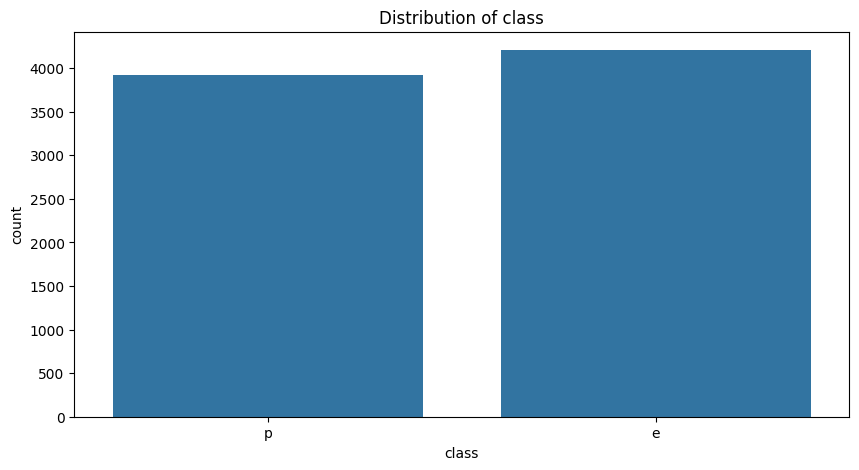

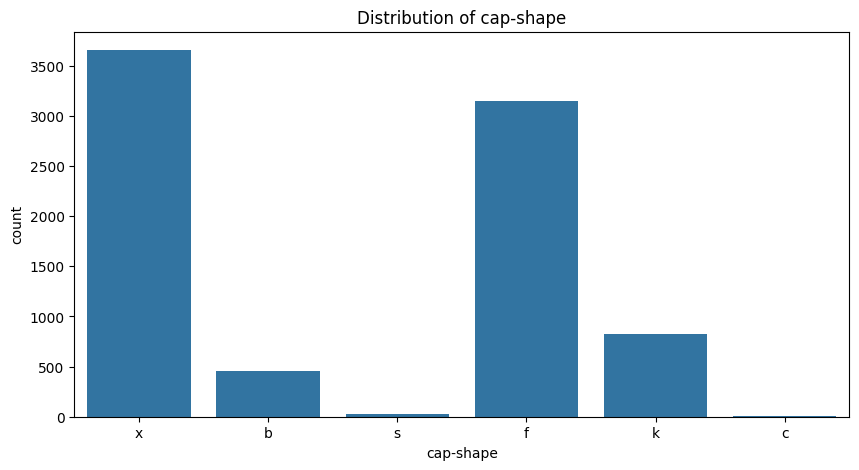

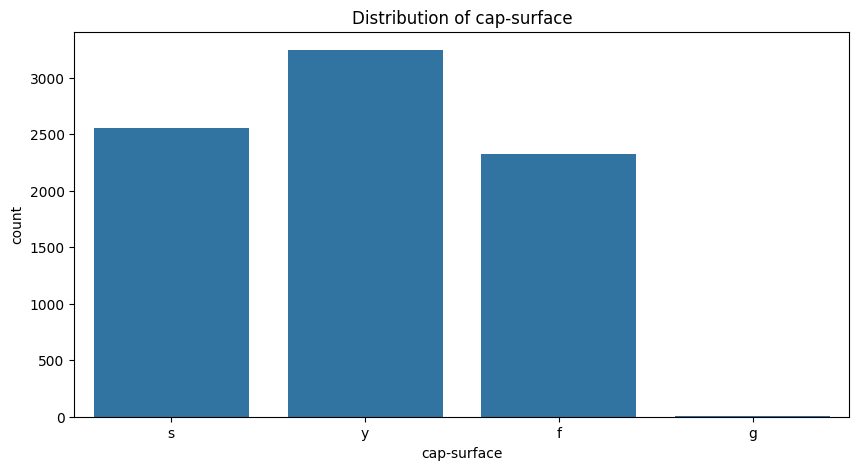

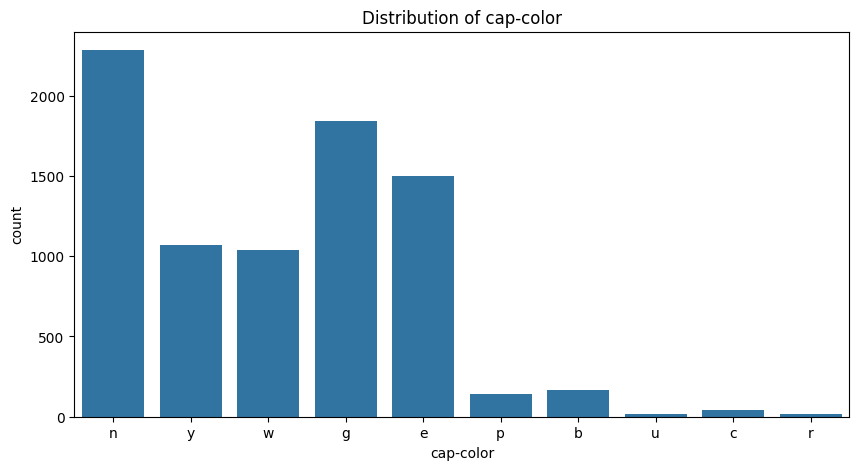

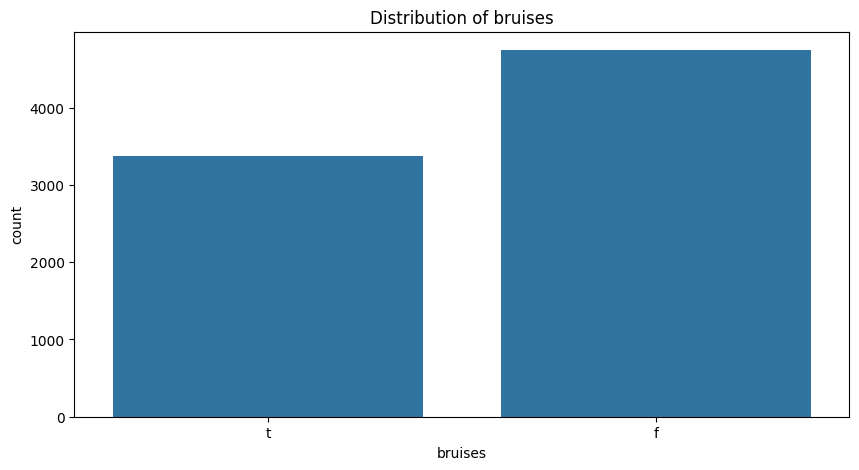

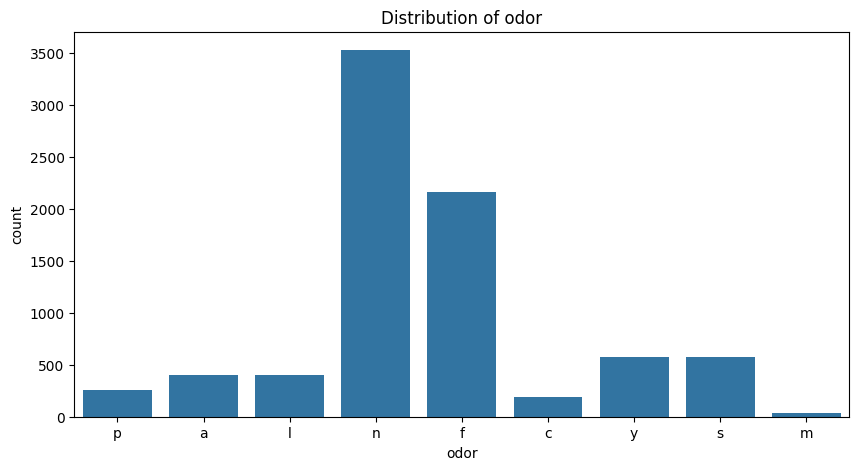

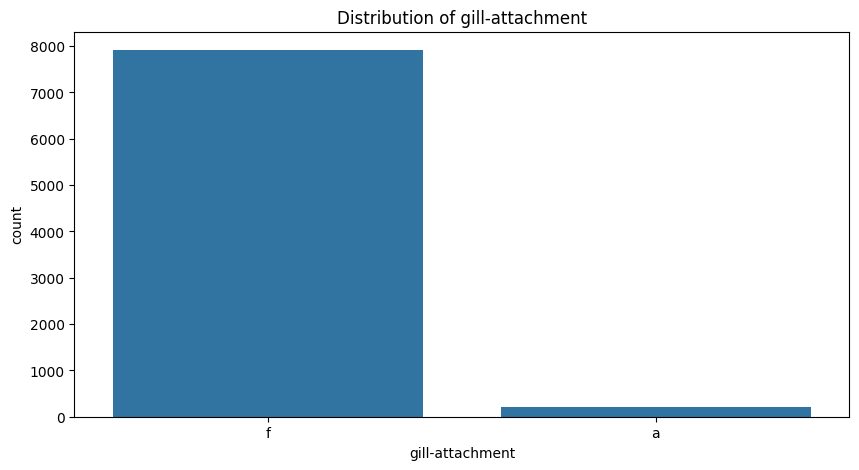

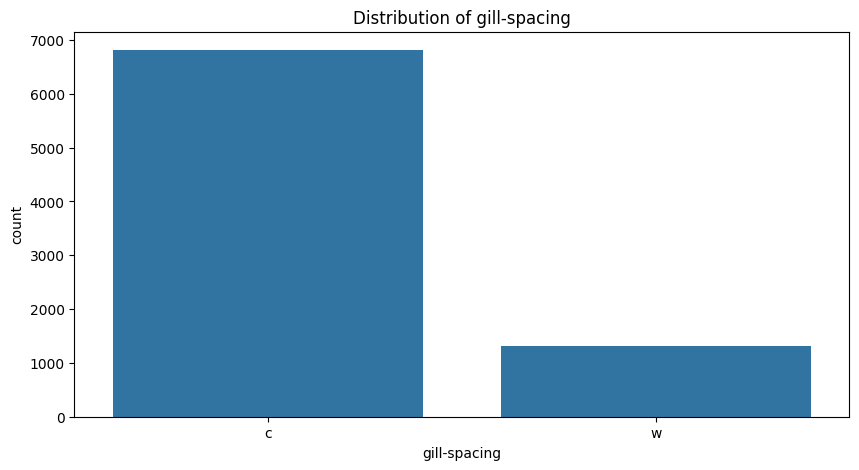

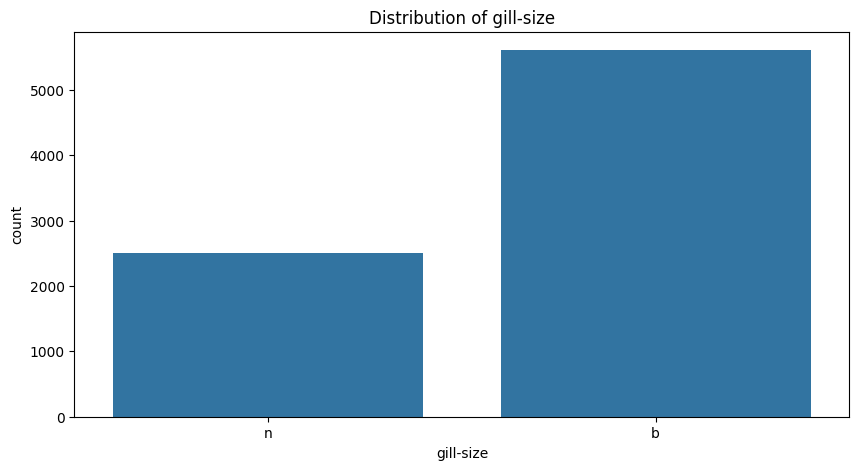

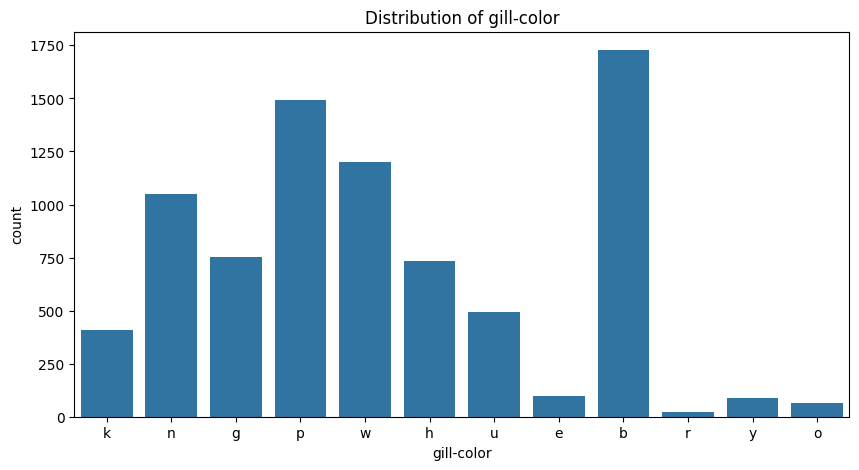

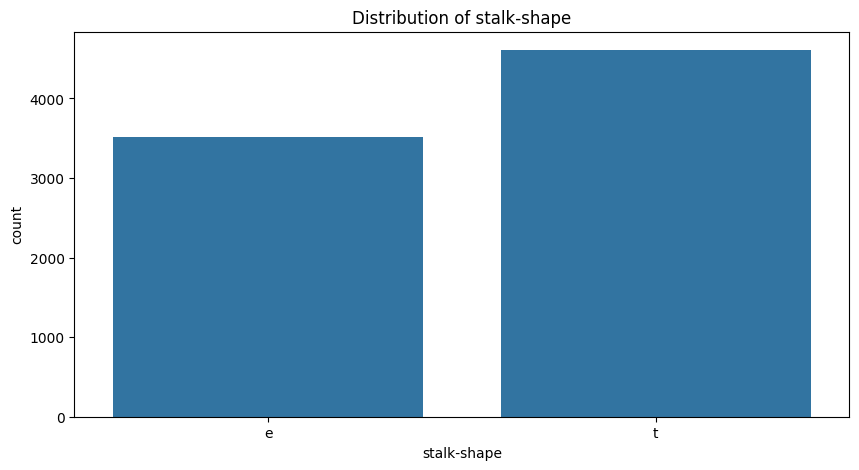

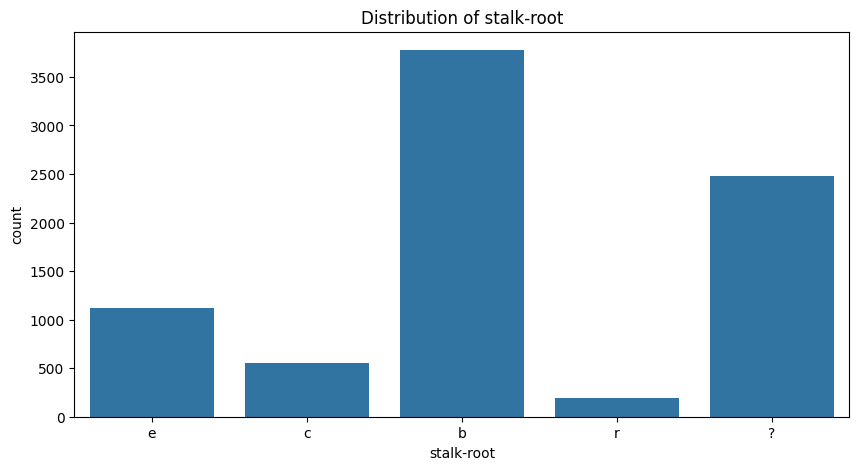

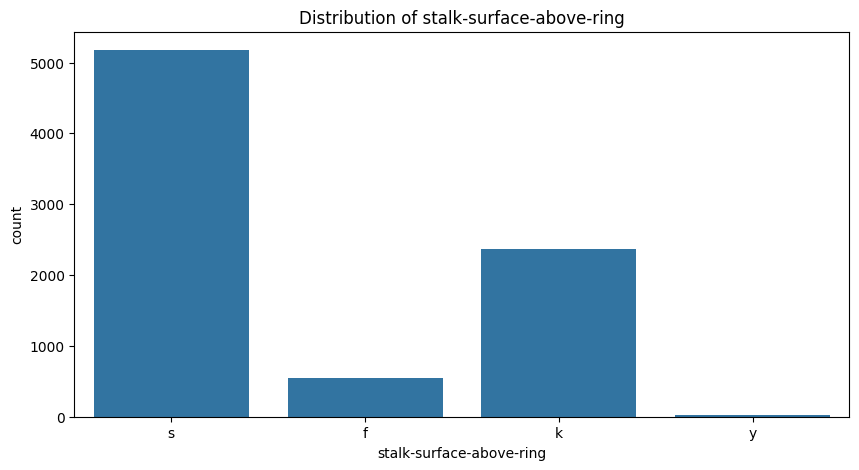

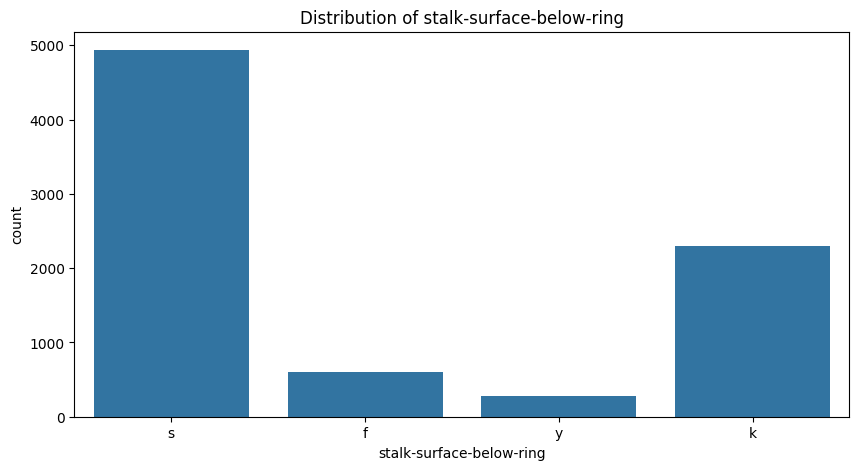

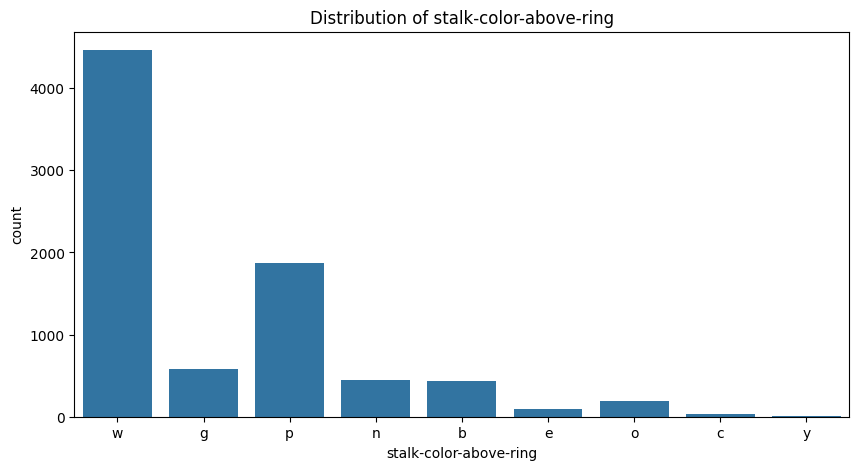

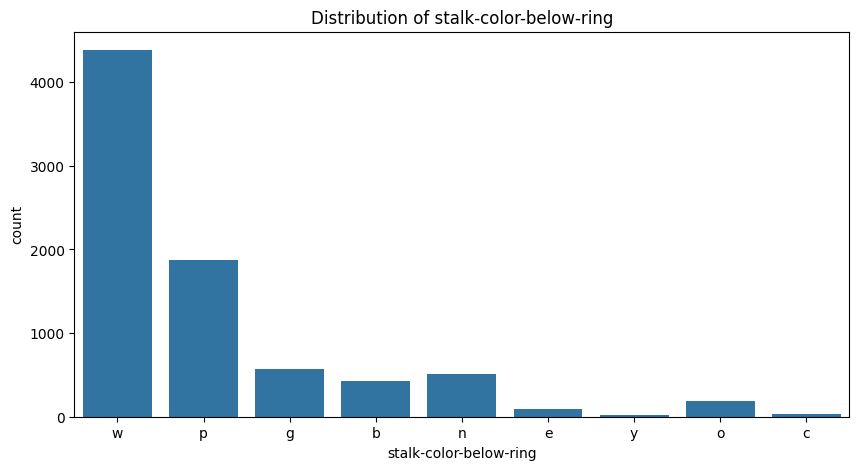

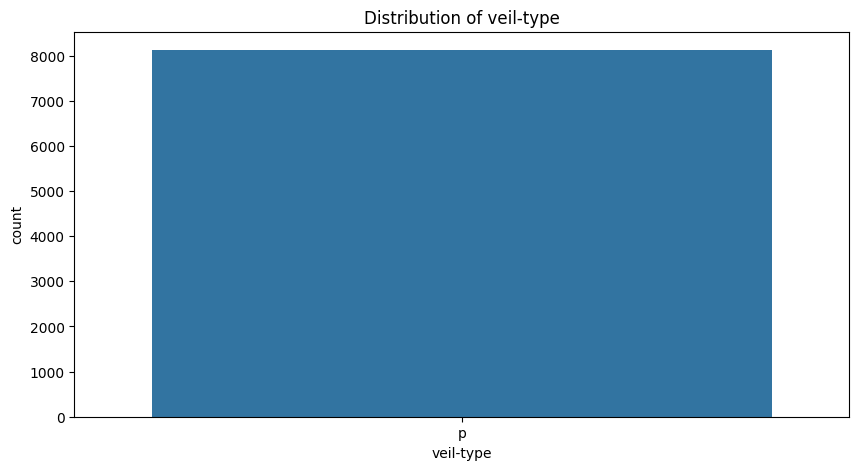

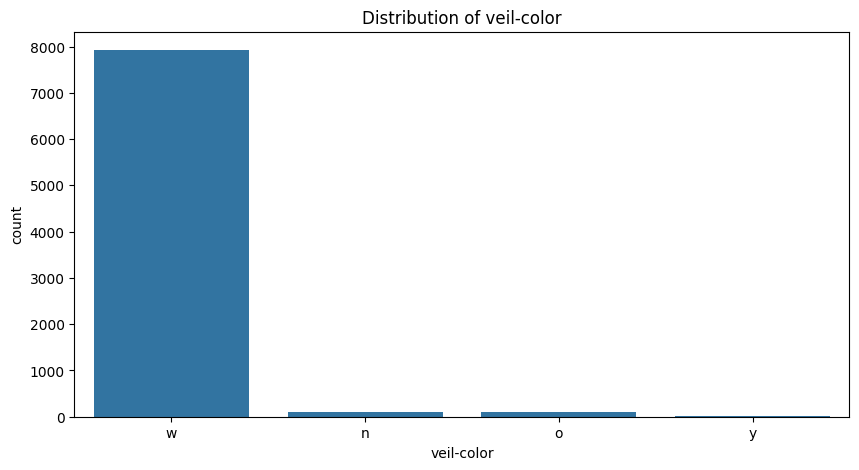

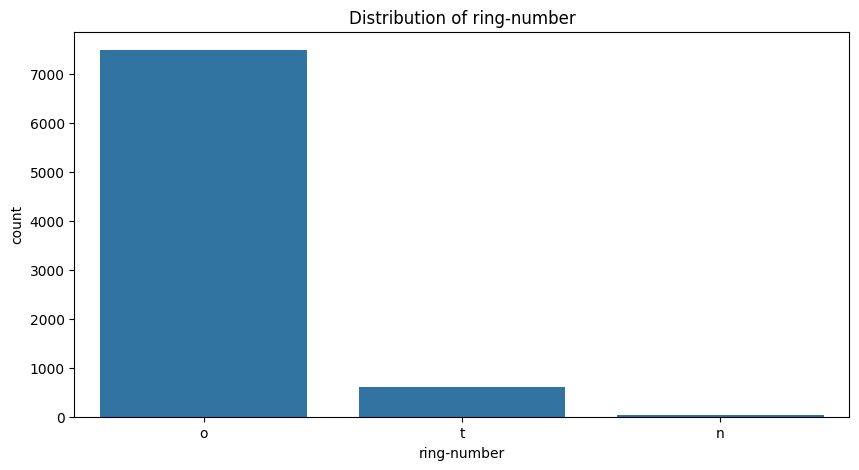

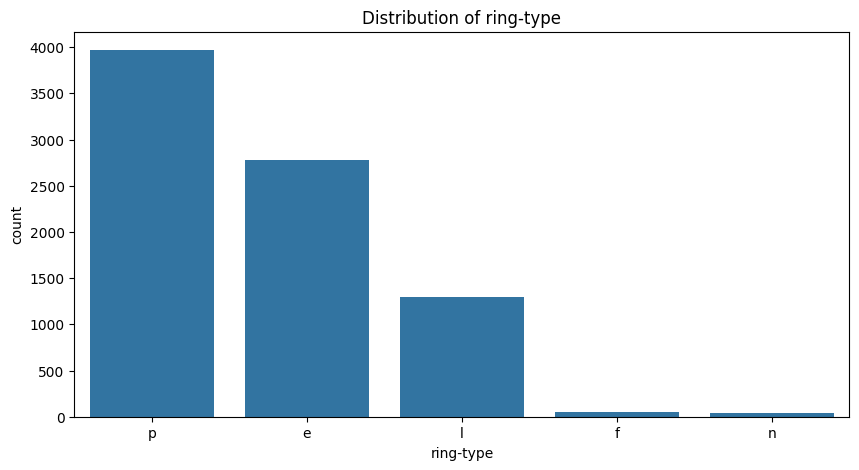

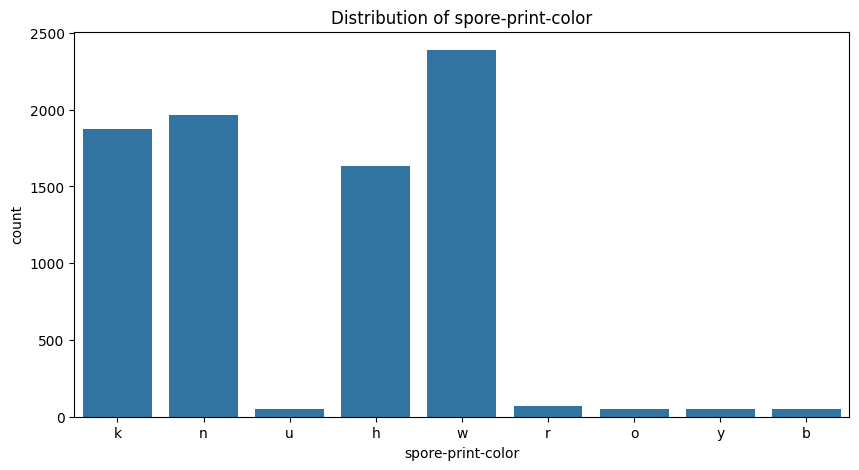

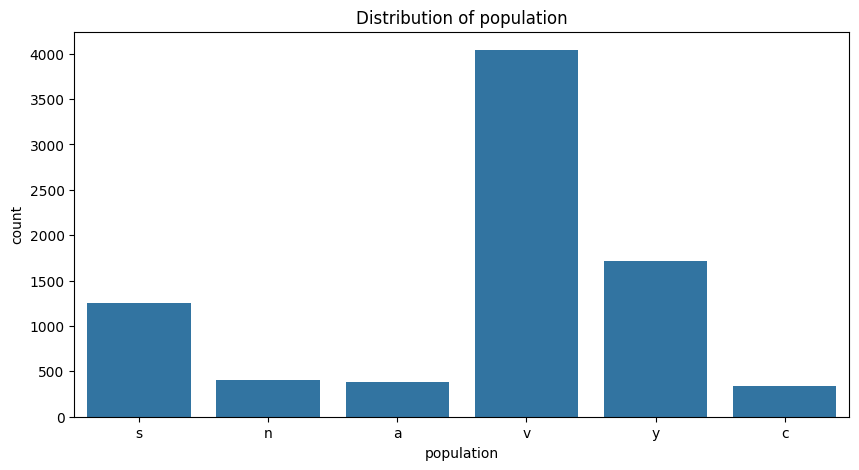

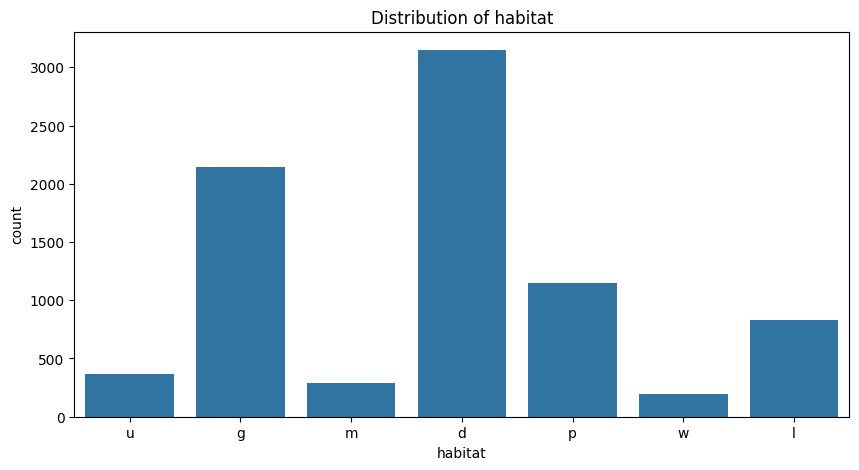

(8124, 119)
       class_e class_p cap-shape_b cap-shape_c cap-shape_f cap-shape_k  \
count     8124    8124        8124        8124        8124        8124   
unique       2       2           2           2           2           2   
top       True   False       False       False       False       False   
freq      4208    4208        7672        8120        4972        7296   

       cap-shape_s cap-shape_x cap-surface_f cap-surface_g  ... population_s  \
count         8124        8124          8124          8124  ...         8124   
unique           2           2             2             2  ...            2   
top          False       False         False         False  ...        False   
freq          8092        4468          5804          8120  ...         6876   

       population_v population_y habitat_d habitat_g habitat_l habitat_m  \
count          8124         8124      8124      8124      8124      8124   
unique            2            2         2         2         2  

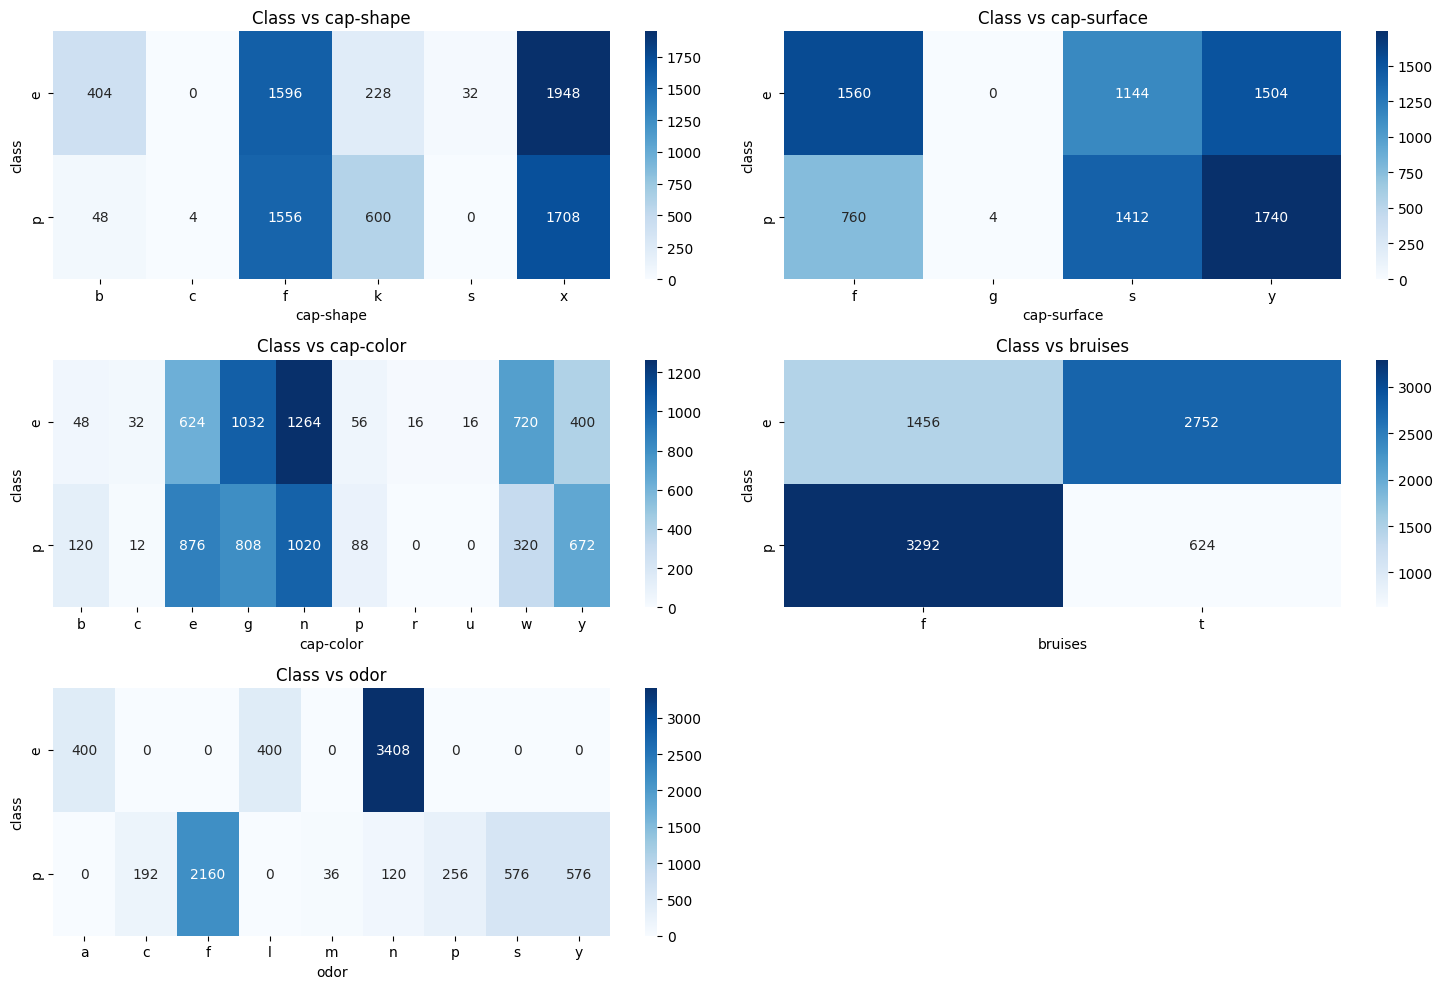

In [10]:
# Plot the distribution of each feature
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

# Encode the categorical data
df_encoded = pd.get_dummies(df)

# Check the shape and summary of the encoded data
print(df_encoded.shape)
print(df_encoded.describe())

# Visualize pairwise relationships using frequency heatmaps for the first few features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:6]):  # Limiting to the first few features for simplicity
    plt.subplot(3, 2, i+1)
    sns.heatmap(pd.crosstab(df['class'], df[column]), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Class vs {column}')
plt.tight_layout()
plt.show()

In [11]:
# Encode the categorical data
df_encoded = pd.get_dummies(df)

In [12]:
# Define the features and the target
X = df_encoded.drop('class_e', axis=1)
y = df_encoded['class_e']

In [13]:
# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create a decision tree classifier with gini criterion and maximum depth of 3
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [15]:
# Fit the model on the train data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [16]:
# Make predictions on the test data
y_pred = dt.predict(X_test)

In [17]:
# Calculate and print the performance of the Decision Tree
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Decision Tree Results")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

Decision Tree Results
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


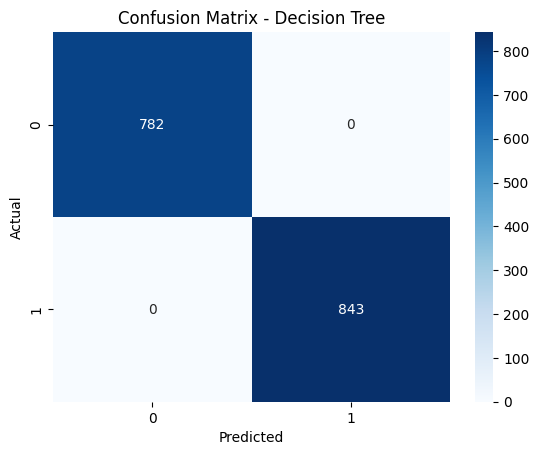

In [18]:
# Plot the confusion matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [19]:
# Print classification report for Decision Tree
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       782
        True       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



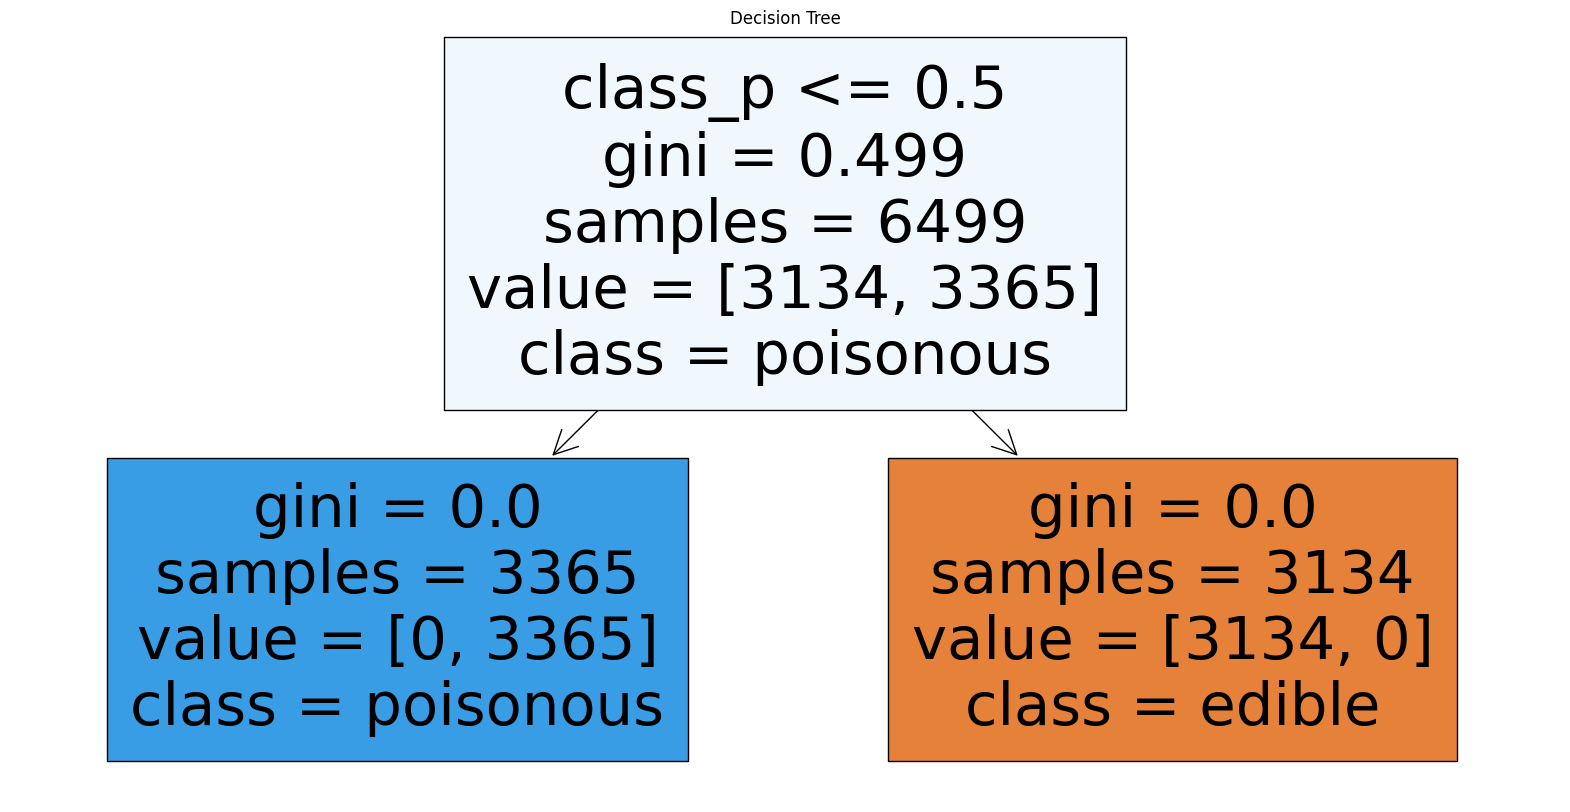

In [20]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.title('Decision Tree')
plt.show()

RF

In [21]:
# Create and train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

In [23]:
# Calculate and print the performance of the Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest Results")
print(f"Accuracy: {acc_rf:.2f}")
print(f"Precision: {prec_rf:.2f}")
print(f"Recall: {rec_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")

Random Forest Results
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


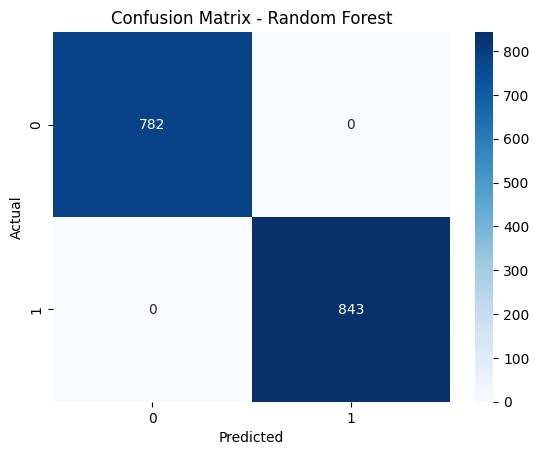

In [24]:
# Plot the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [29]:
# Print classification report for Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       782
        True       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



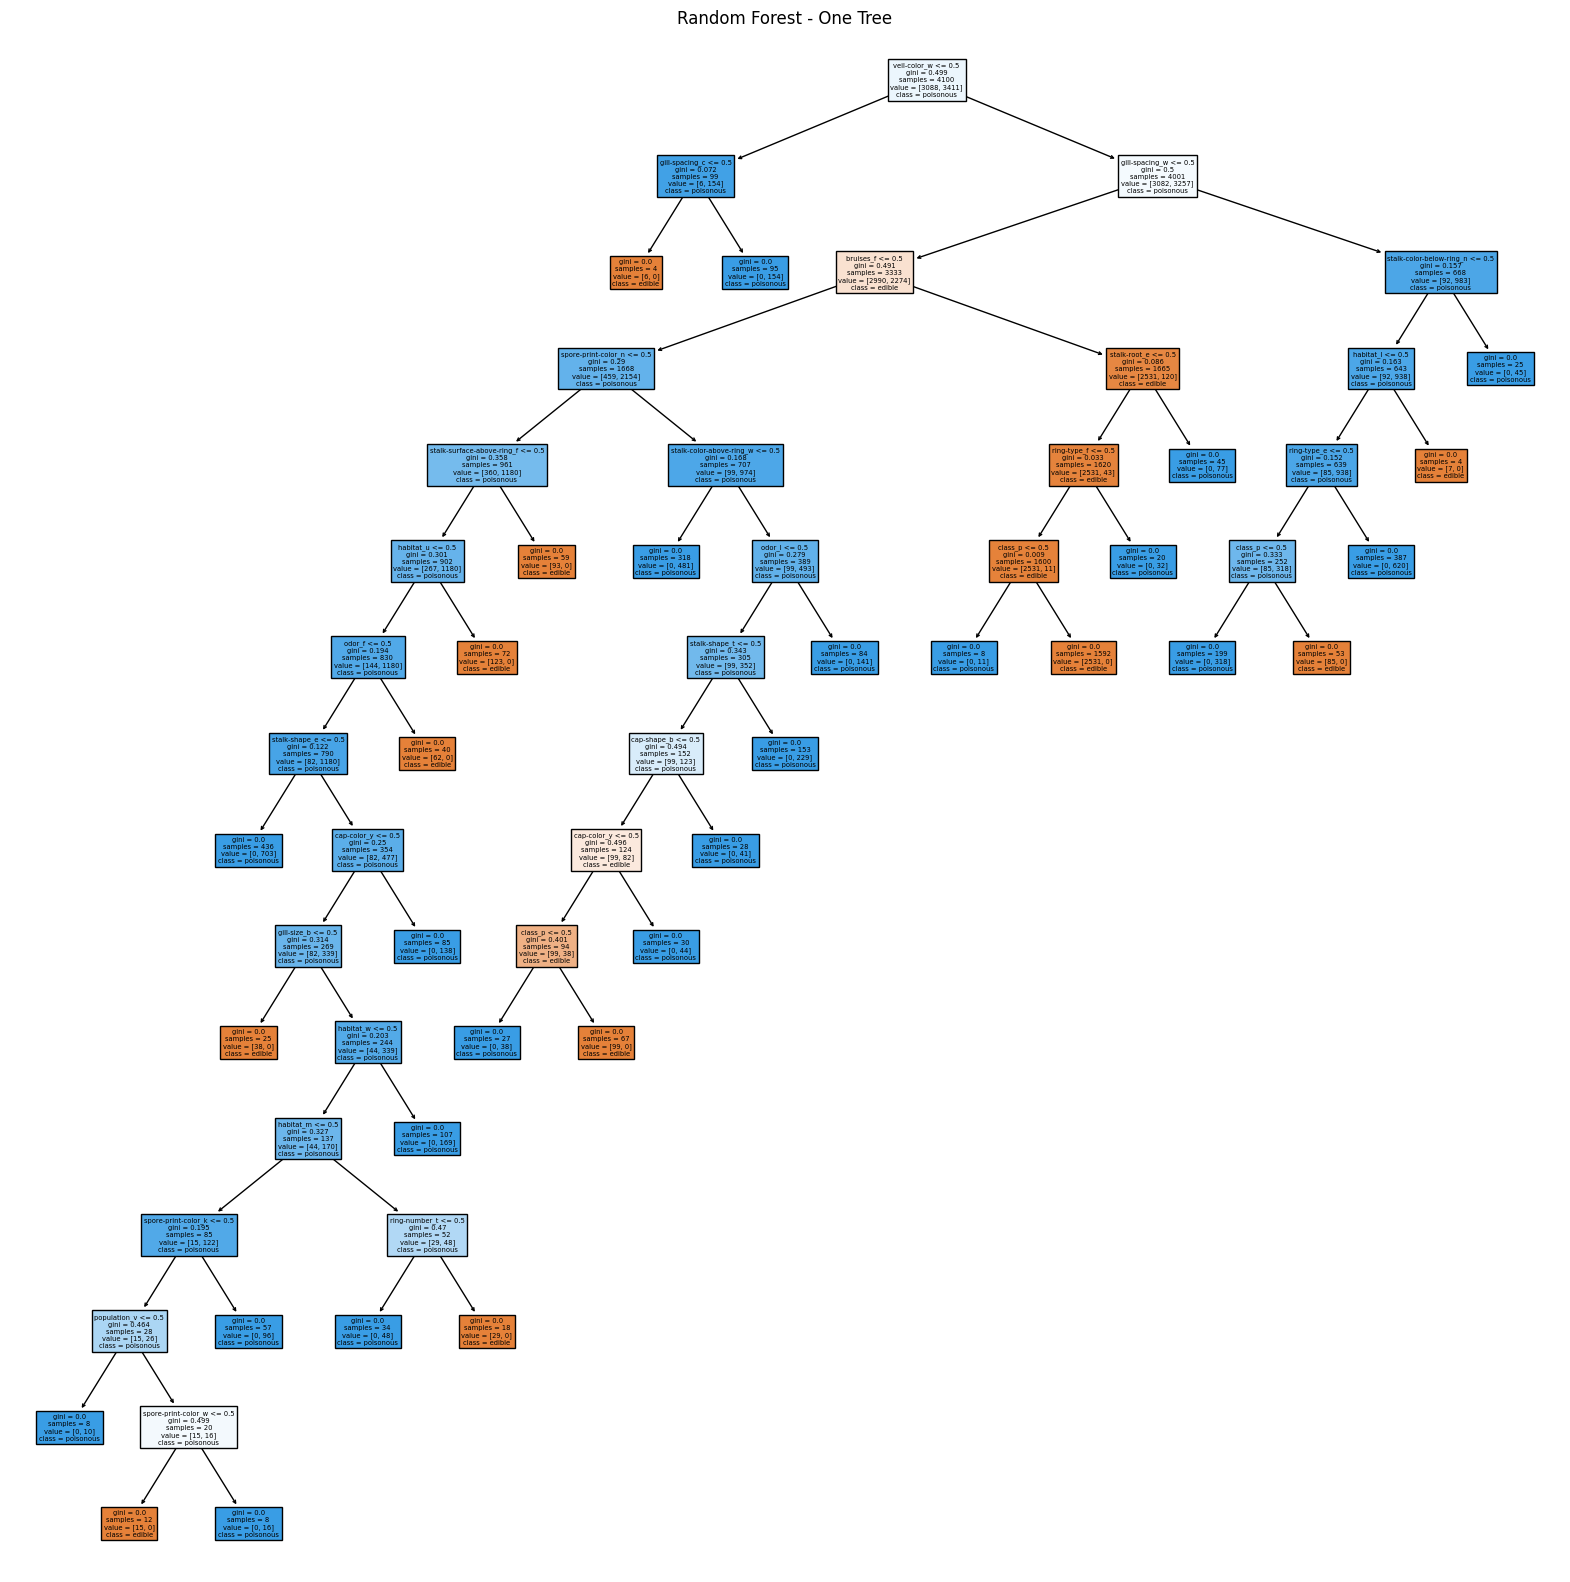

In [33]:
# Visualize one of the trees from the Random Forest
plt.figure(figsize=(20, 20))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.title('Random Forest - One Tree')
plt.show()

In [34]:
# Evaluate and compare Random Forest accuracy for different n_estimators values
estimators = [1, 50, 100, 150, 200, 250]
results = []
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append(acc)
    print(f'n_estimators: {n}, Accuracy: {acc:.2f}')


n_estimators: 1, Accuracy: 1.00
n_estimators: 50, Accuracy: 1.00
n_estimators: 100, Accuracy: 1.00
n_estimators: 150, Accuracy: 1.00
n_estimators: 200, Accuracy: 1.00
n_estimators: 250, Accuracy: 1.00


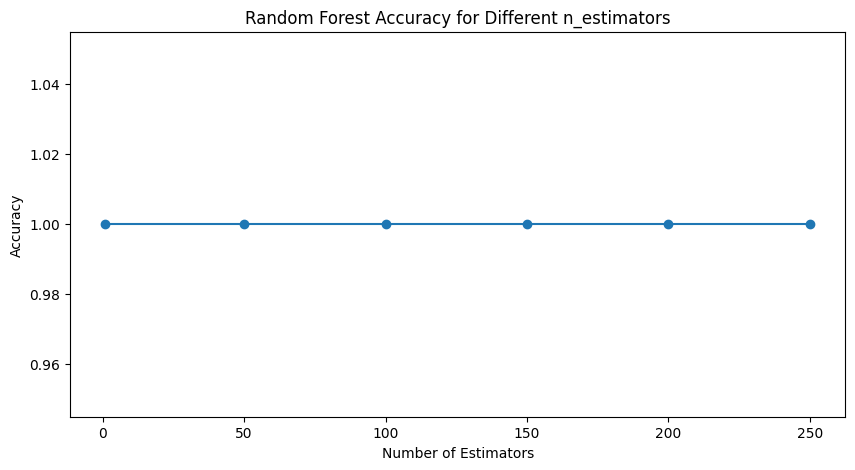

In [26]:
# Plot the accuracy for different n_estimators values
plt.figure(figsize=(10, 5))
plt.plot(estimators, results, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy for Different n_estimators')
plt.show()

In [35]:
# Compare performance of Random Forest and Decision Tree
print("Comparison of Decision Tree and Random Forest")
print("Decision Tree")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nRandom Forest")
print(f"Accuracy: {acc_rf:.2f}")
print(f"Precision: {prec_rf:.2f}")
print(f"Recall: {rec_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")

Comparison of Decision Tree and Random Forest
Decision Tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Random Forest
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
